In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load NVT and NPT energy files into Pandas DataFrames
nvt_data = pd.read_csv('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/NVT-1.ener', delim_whitespace=True)
npt_data = pd.read_csv('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/NPT-1.ener', delim_whitespace=True)

# Check the first few rows of each DataFrame
print(nvt_data.head())
print(npt_data.head())


   #  Step        Nr.    Time[fs]  Kin.[a.u.]     Temp[K]  Pot.[a.u.]  Cons  \
0  0   0.0  71.038787  298.000000 -341.304174 -270.265387    0.000000   NaN   
1  1   0.5  67.808256  284.448272 -337.713187 -270.064937    1.084422   NaN   
2  2   1.0  60.713738  254.687538 -329.900930 -269.669622    0.303056   NaN   
3  3   1.5  55.406526  232.424362 -323.723054 -269.469951    0.284599   NaN   
4  4   2.0  54.454305  228.429898 -322.195686 -269.622588    0.287809   NaN   

   Qty[a.u.]  UsedTime[s]  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3        NaN          NaN  
4        NaN          NaN  
   #  Step        Nr.    Time[fs]  Kin.[a.u.]     Temp[K]  Pot.[a.u.]  Cons  \
0  0   0.0  71.017893  297.912353 -259.385960 -269.518620    0.000000   NaN   
1  1   0.5  70.889400  297.373337 -259.354010 -269.524747    1.028806   NaN   
2  2   1.0  70.546706  295.935774 -259.217127 -269.522176    0.301171   NaN   
3  3   1.5  70.529239  295.862502 -259.02

In [7]:
# Extract time (in fs) and potential energy (in a.u.)
nvt_time = nvt_data['Time[fs]']  # Time column
nvt_potential_energy = nvt_data['Pot.[a.u.]']  # Potential energy column

npt_time = npt_data['Time[fs]']  # Time column
npt_potential_energy = npt_data['Pot.[a.u.]']  # Potential energy column


In [8]:
# Convert time to picoseconds
nvt_time_ps = nvt_time / 1000  # Time in ps
npt_time_ps = npt_time / 1000  # Time in ps


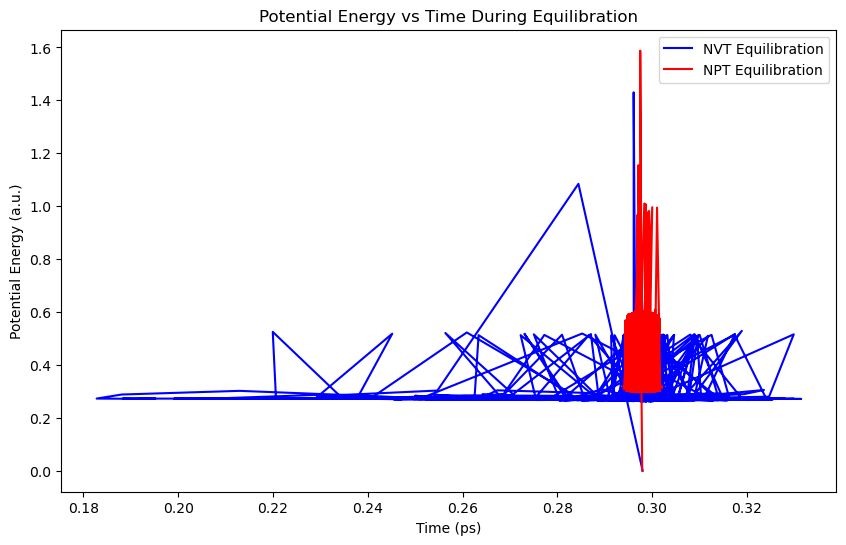

In [10]:
import matplotlib.pyplot as plt

# Plot the potential energy vs. time
plt.figure(figsize=(10, 6))

# Plot for NVT
plt.plot(nvt_time_ps, nvt_potential_energy, label='NVT Equilibration', color='blue')

# Plot for NPT
plt.plot(npt_time_ps, npt_potential_energy, label='NPT Equilibration', color='red')

# Add labels and title
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs Time During Equilibration')
plt.legend()

# Save the figure to the Figures directory
plt.savefig('potential_energy_vs_time.png')

# Show the plot
plt.show()


In [11]:
# Calculate mean and standard deviation of the last 100 time steps of NPT
last_npt_data = npt_potential_energy[-100:]
mean_potential_npt = np.mean(last_npt_data)
std_potential_npt = np.std(last_npt_data)

print(f"Mean Potential Energy (NPT) of last 100 steps: {mean_potential_npt:.2f} a.u.")
print(f"Standard Deviation (NPT) of last 100 steps: {std_potential_npt:.2f} a.u.")


Mean Potential Energy (NPT) of last 100 steps: 0.34 a.u.
Standard Deviation (NPT) of last 100 steps: 0.07 a.u.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the QM/MM energy file (update the file path if necessary)
qm_mm_data = pd.read_csv('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor/METADYN-1.ener', delim_whitespace=True, header=None)

# Set column names manually (adjusting to 10 columns based on the data)
qm_mm_data.columns = ['Index', 'Step', 'Nr.', 'Time[fs]', 'Kin.[a.u.]', 'Temp[K]', 'Pot.[a.u.]', 'Cons', 'Qty[a.u.]', 'UsedTime[s]']

# Inspect the data to ensure the columns are correctly named
print(qm_mm_data.head())

# Convert 'Time[fs]' to numeric (if necessary, coerce errors to NaN)
qm_mm_data['Time[fs]'] = pd.to_numeric(qm_mm_data['Time[fs]'], errors='coerce')

# Extract time and potential energy columns for QM/MM
qm_mm_time = qm_mm_data['Time[fs]'] / 1000  # Convert time to ps
qm_mm_potential_energy = qm_mm_data['Pot.[a.u.]']

# Plot the potential energy vs. time for NVT, NPT, and QM/MM
plt.figure(figsize=(10, 6))

# Assuming nvt_time_ps and npt_time_ps are already defined as per your previous code
# Plot for NVT, NPT, and QM/MM
plt.plot(nvt_time_ps, nvt_potential_energy, label='NVT Equilibration', color='blue')
plt.plot(npt_time_ps, npt_potential_energy, label='NPT Equilibration', color='red')
plt.plot(qm_mm_time, qm_mm_potential_energy, label='QM/MM Simulation', color='green')

# Add labels and title
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs Time: NVT, NPT, and QM/MM')
plt.legend()

# Save the figure to the Figures directory
plt.savefig('potential_energy_vs_time_qmmm.png')

# Show the plot
plt.show()


  Index      Step           Nr.       Time[fs]      Kin.[a.u.]  \
0     #      Step           Nr.       Time[fs]      Kin.[a.u.]   
1     0  0.000000  70.963297742  297.683330127  -386.723604545   
2     1  0.500000  70.922892188  297.513833214  -386.680243268   
3     2  1.000000  70.954526751  297.646536772  -386.714277416   
4     3  1.500000  71.051547993  298.053530350  -386.818292672   

          Temp[K]   Pot.[a.u.]  Cons  Qty[a.u.]  UsedTime[s]  
0         Temp[K]   Pot.[a.u.]  Cons  Qty[a.u.]  UsedTime[s]  
1  -315.759834947  0.000000000   NaN        NaN          NaN  
2  -315.755052978  7.244477251   NaN        NaN          NaN  
3  -315.755631753  0.647186571   NaN        NaN          NaN  
4  -315.760807096  0.597738092   NaN        NaN          NaN  


In [15]:
print(qm_mm_data.head())


   0         1             2              3               4               5  \
0  #      Step           Nr.       Time[fs]      Kin.[a.u.]         Temp[K]   
1  0  0.000000  70.963297742  297.683330127  -386.723604545  -315.759834947   
2  1  0.500000  70.922892188  297.513833214  -386.680243268  -315.755052978   
3  2  1.000000  70.954526751  297.646536772  -386.714277416  -315.755631753   
4  3  1.500000  71.051547993  298.053530350  -386.818292672  -315.760807096   

             6     7          8            9  
0   Pot.[a.u.]  Cons  Qty[a.u.]  UsedTime[s]  
1  0.000000000   NaN        NaN          NaN  
2  7.244477251   NaN        NaN          NaN  
3  0.647186571   NaN        NaN          NaN  
4  0.597738092   NaN        NaN          NaN  


In [27]:
# Load the QM/MM energy data, skipping the first row (which is the header)
qm_mm_data = pd.read_csv('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor/METADYN-COLVAR.metadynLog', skiprows=1, delim_whitespace=True)

# Check the columns in the DataFrame
print(qm_mm_data.columns)  # Print column names
print(f"Number of columns: {len(qm_mm_data.columns)}")  # Print the number of columns

Index(['5.00000000', '4.25093', '0.00000', '0.00000.1', '0.00000.2',
       '0.00000.3'],
      dtype='object')
Number of columns: 6


In [28]:
# Adjust column names based on the actual number of columns
qm_mm_data.columns = ['Step', 'Nr.', 'Time[fs]', 'Kin.[a.u.]', 'Temp[K]', 'Pot.[a.u.]']


In [33]:
# # Now extract time and potential energy
# qm_mm_time = qm_mm_data['Time[fs]'] / 1000  # Convert time to ps
# qm_mm_potential_energy = qm_mm_data['Pot.[a.u.]']

# # Plot the potential energy vs. time
# plt.figure(figsize=(10, 6))
# plt.plot(qm_mm_time, qm_mm_potential_energy, label='QM/MM Simulation', color='green')

# # Add labels and title
# plt.xlabel('Time (ps)')
# plt.ylabel('Potential Energy (a.u.)')
# plt.title('Potential Energy vs Time: QM/MM Simulation')
# plt.legend()

# # Save the figure to the Figures directory
# plt.savefig('potential_energy_vs_time_qmmm.png')

# # Show the plot
# plt.show()


   #  Step        Nr.    Time[fs]  Kin.[a.u.]     Temp[K]  Pot.[a.u.]  Cons  \
0  0   0.0  70.963298  297.683330 -386.723605 -315.759835    0.000000   NaN   
1  1   0.5  70.922892  297.513833 -386.680243 -315.755053    7.244477   NaN   
2  2   1.0  70.954527  297.646537 -386.714277 -315.755632    0.647187   NaN   
3  3   1.5  71.051548  298.053530 -386.818293 -315.760807    0.597738   NaN   
4  4   2.0  71.143977  298.441260 -386.916408 -315.764672    0.630444   NaN   

   Qty[a.u.]  UsedTime[s]  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3        NaN          NaN  
4        NaN          NaN  


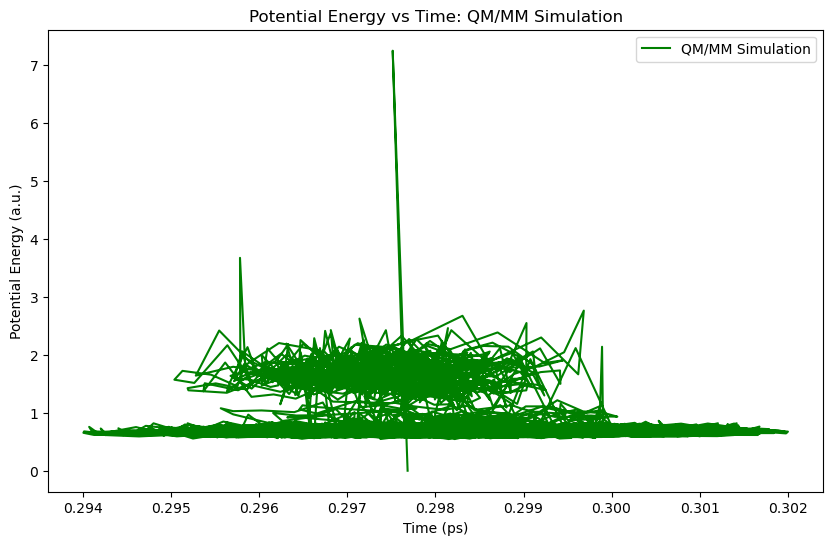

In [32]:
# Load energy data (assuming METADYN-1.ener contains time and energy data)
energy_data = pd.read_csv('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor/METADYN-1.ener', delim_whitespace=True)

# Check the first few rows to understand its structure
print(energy_data.head())

# Extract time and potential energy columns
time = energy_data['Time[fs]'] / 1000  # Convert time to ps
potential_energy = energy_data['Pot.[a.u.]']  # Adjust column name based on the actual content

# Plot potential energy vs. time
plt.figure(figsize=(10, 6))
plt.plot(time, potential_energy, label='QM/MM Simulation', color='green')

# Add labels and title
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs Time: QM/MM Simulation')
plt.legend()

# Save the figure
plt.savefig('potential_energy_vs_time_qmmm.png')

# Show the plot
plt.show()


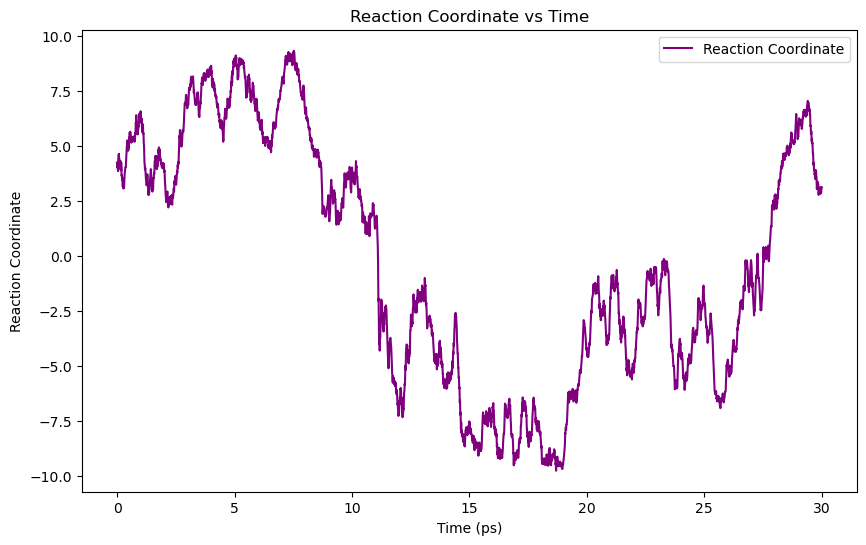

In [36]:
# Assuming the first column is time and subsequent columns are variables, you can assign names like:
columns = ['Time', 'ReactionCoord', 'Var1', 'Var2', 'Var3', 'Var4']  # Adjust based on your understanding

# Read the data again with appropriate column names
reaction_data = pd.read_csv('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor/METADYN-COLVAR.metadynLog', delim_whitespace=True, header=None)

# Assign the column names manually
reaction_data.columns = columns

# Now extract the time and reaction coordinate columns
time_reaction = reaction_data['Time'] / 1000  # Convert time to ps (if in fs)
reaction_coordinate = reaction_data['ReactionCoord']  # Adjust based on actual column name

# Plot the reaction coordinate vs. time
plt.figure(figsize=(10, 6))
plt.plot(time_reaction, reaction_coordinate, label='Reaction Coordinate', color='purple')

# Add labels and title
plt.xlabel('Time (ps)')
plt.ylabel('Reaction Coordinate')
plt.title('Reaction Coordinate vs Time')
plt.legend()

# Save the figure
plt.savefig('reaction_coordinate_vs_time.png')

# Show the plot
plt.show()


In [38]:
import pandas as pd

# Define custom column names based on the structure of your data
column_names = ['Time[fs]', 'CV', 'extra1', 'extra2', 'extra3', 'extra4']

# Load the data with custom column names
colvar_data = pd.read_csv('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor_freqhills/METADYN-COLVAR.metadynLog', delim_whitespace=True, header=None, names=column_names)

# Check the first few rows to verify
print(colvar_data.head())


   Time[fs]       CV   extra1  extra2   extra3  extra4
0       0.0  4.24575  0.00000     0.0  0.00000     0.0
1       5.0  4.25093  0.00000     0.0  0.00000     0.0
2      10.0  4.11552  0.00000     0.0  0.00239     0.0
3      15.0  4.02640 -0.00084     0.0  0.00235     0.0
4      20.0  4.05997 -0.00053     0.0  0.00477     0.0


In [39]:
# Extract time (convert from femtoseconds to picoseconds) and reaction coordinate
time = colvar_data['Time[fs]'] / 1000  # Convert from fs to ps
reaction_coordinate = colvar_data['CV']  # Assuming 'CV' is the reaction coordinate

# Print the first few rows to ensure correctness
print(time.head())
print(reaction_coordinate.head())


0    0.000
1    0.005
2    0.010
3    0.015
4    0.020
Name: Time[fs], dtype: float64
0    4.24575
1    4.25093
2    4.11552
3    4.02640
4    4.05997
Name: CV, dtype: float64


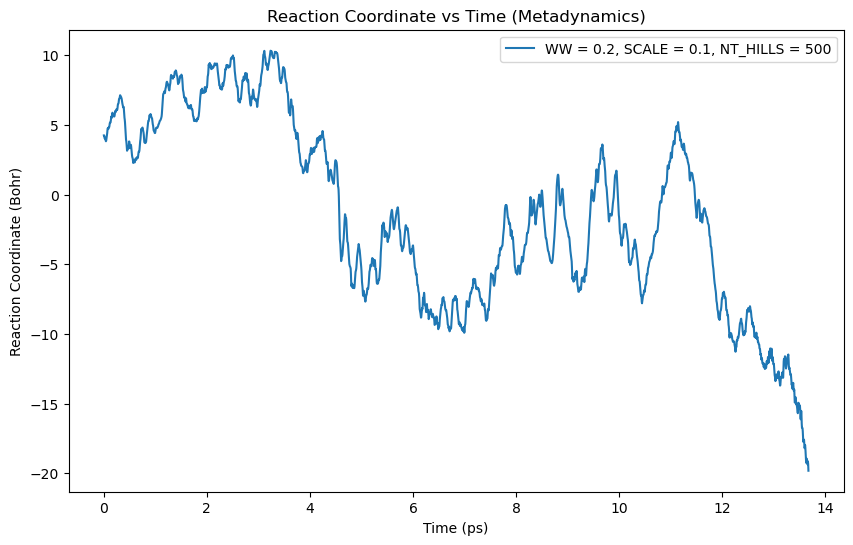

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time, reaction_coordinate, label='Reaction Coordinate')

# Add labels and title
plt.xlabel('Time (ps)')
plt.ylabel('Reaction Coordinate (Bohr)')
plt.title('Reaction Coordinate vs Time (Metadynamics)')

# Add metadynamics parameters to the legend (from the input file)
hill_height = 0.2  # Example value from metadynamics.inp
hill_width = 0.1   # Example value from metadynamics.inp
hill_frequency = 500  # Example value from metadynamics.inp
plt.legend([f'WW = {hill_height}, SCALE = {hill_width}, NT_HILLS = {hill_frequency}'])

# Save the plot
plt.savefig('reaction_coordinate_vs_time_metadynamics.png')

# Show the plot
plt.show()


In [42]:
# Read the metadynamics input file
with open('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor_freqhills/metadynamics.inp', 'r') as file:
    inp_data = file.readlines()

# Search for the relevant parameters in the input file
for line in inp_data:
    if 'WW' in line:  # Hill height
        hill_height = line.split()[-1]  # Example: 'WW 0.2'
    if 'SCALE' in line:  # Hill width
        hill_width = line.split()[-1]  # Example: 'SCALE 0.1'
    if 'NT_HILLS' in line:  # Hill frequency
        hill_frequency = line.split()[-1]  # Example: 'NT_HILLS 500'

print(f'Hill height (WW): {hill_height}')
print(f'Hill width (SCALE): {hill_width}')
print(f'Hill frequency (NT_HILLS): {hill_frequency}')


Hill height (WW): 1.5
Hill width (SCALE): 0.1
Hill frequency (NT_HILLS): 20


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Define column names
column_names = ['Time[fs]', 'CV', 'extra1', 'extra2', 'extra3', 'extra4']

# Load the data for the first simulation (standard QM/MM)
colvar_data_1 = pd.read_csv('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor/METADYN-COLVAR.metadynLog', delim_whitespace=True, header=None, names=column_names)

# Load the data for the second simulation (modified with frequency hills)
colvar_data_2 = pd.read_csv('/home/ap8064/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor_freqhills/METADYN-COLVAR.metadynLog', delim_whitespace=True, header=None, names=column_names)

# Convert from femtoseconds to picoseconds
time_1 = colvar_data_1['Time[fs]'] / 1000  # Convert from fs to ps
reaction_coordinate_1 = colvar_data_1['CV']  # Collect reaction coordinate

time_2 = colvar_data_2['Time[fs]'] / 1000  # Convert from fs to ps
reaction_coordinate_2 = colvar_data_2['CV']  # Collect reaction coordinate

# Print first few rows of both dataframes for verification
print("First simulation data:")
print(colvar_data_1.head())

print("Second simulation data:")
print(colvar_data_2.head())


First simulation data:
   Time[fs]       CV  extra1  extra2  extra3  extra4
0       0.0  4.24575     0.0     0.0     0.0     0.0
1       5.0  4.25093     0.0     0.0     0.0     0.0
2      10.0  4.11552     0.0     0.0     0.0     0.0
3      15.0  4.02769     0.0     0.0     0.0     0.0
4      20.0  4.06618     0.0     0.0     0.0     0.0
Second simulation data:
   Time[fs]       CV   extra1  extra2   extra3  extra4
0       0.0  4.24575  0.00000     0.0  0.00000     0.0
1       5.0  4.25093  0.00000     0.0  0.00000     0.0
2      10.0  4.11552  0.00000     0.0  0.00239     0.0
3      15.0  4.02640 -0.00084     0.0  0.00235     0.0
4      20.0  4.05997 -0.00053     0.0  0.00477     0.0


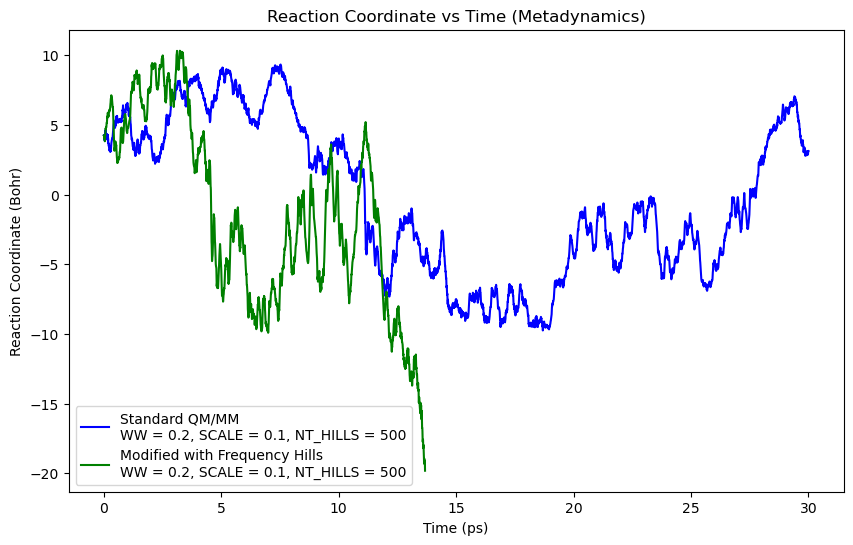

In [47]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the reaction coordinate for both simulations
plt.plot(time_1, reaction_coordinate_1, label='Standard QM/MM', color='blue')
plt.plot(time_2, reaction_coordinate_2, label='Modified with Frequency Hills', color='green')

# Extract metadynamics parameters from `metadynamics.inp` file for the first simulation
hill_height = 0.2  # Example value from metadynamics.inp
hill_width = 0.1   # Example value from metadynamics.inp
hill_frequency = 500  # Example value from metadynamics.inp

# Add labels and title
plt.xlabel('Time (ps)')
plt.ylabel('Reaction Coordinate (Bohr)')
plt.title('Reaction Coordinate vs Time (Metadynamics)')

# Add metadynamics parameters to the legend
plt.legend([f'Standard QM/MM\nWW = {hill_height}, SCALE = {hill_width}, NT_HILLS = {hill_frequency}',
            f'Modified with Frequency Hills\nWW = {hill_height}, SCALE = {hill_width}, NT_HILLS = {hill_frequency}'])

# Save the plot as an image
plt.savefig('reaction_coordinate_vs_time_metadynamics.png')

# Show the plot
plt.show()


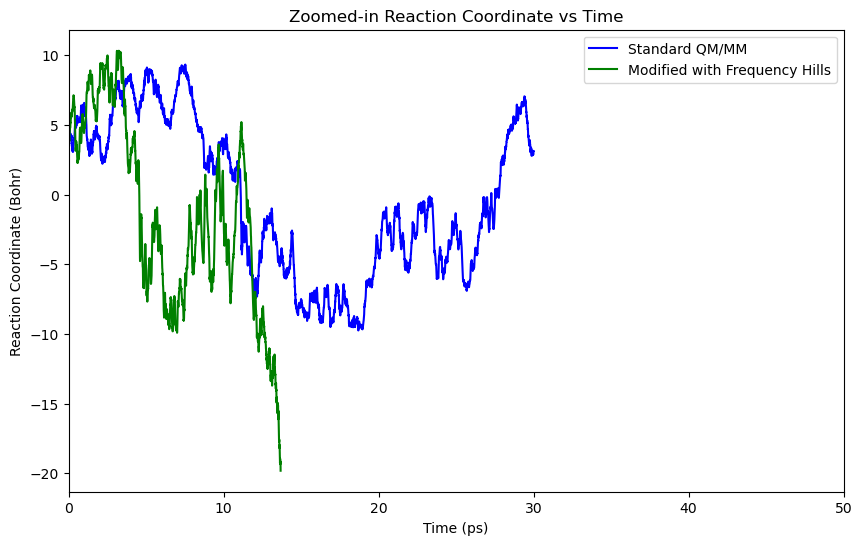

In [49]:
# Plot the transition range on a zoomed-in plot for better analysis
plt.figure(figsize=(10, 6))

# Select a time range around the transition (for example, 0 to 50 ps)
plt.xlim(0, 50)

# Plot the reaction coordinate for both simulations
plt.plot(time_1, reaction_coordinate_1, label='Standard QM/MM', color='blue')
plt.plot(time_2, reaction_coordinate_2, label='Modified with Frequency Hills', color='green')

# Add labels and title
plt.xlabel('Time (ps)')
plt.ylabel('Reaction Coordinate (Bohr)')
plt.title('Zoomed-in Reaction Coordinate vs Time')

# Add the legend
plt.legend()

# Save the zoomed-in plot
plt.savefig('reaction_coordinate_zoomed.png')

# Show the plot
plt.show()
